In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# read from json files
issues = pd.read_json("./data/gh-issue-event.json")

In [38]:
# show heads, that helps determine how is data structured
issues.head()

,name,year,quarter,count
0,JavaScript,2012,2,29168
1,Ruby,2012,2,21053
2,Python,2012,2,20940
3,PHP,2012,2,13371
4,Java,2012,2,12817


In [39]:
# shape: tuple of (ENTRIES, COLUMNS)
issues.shape

(3340, 4)

In [128]:
# There are too many entries, let's filter a little bit
# I have to create some helper functions
def get_data_from_dataframe(dataframe, loc):
    return dataframe \
            .loc[dataframe.name==loc] \
            .sort_values(by=['year', 'count'], ascending=False) \
            .drop_duplicates(keep="first", subset=["name","year"])
        

javascript = get_data_from_dataframe(dataframe=issues, loc="JavaScript")
rust = get_data_from_dataframe(dataframe=issues, loc="Rust")
python = get_data_from_dataframe(dataframe=issues, loc="Python")

In [129]:
# now I have the data that I need to create a yearly chart
# this reflects max usage of each year
# I'm excluding quarters average
python

,name,year,quarter,count
3123,Python,2022,1,76748
2853,Python,2021,1,92828
2618,Python,2020,2,118232
2227,Python,2019,1,121095
1879,Python,2018,1,155241
1569,Python,2017,2,192622
1257,Python,2016,3,172407
935,Python,2015,4,147092
488,Python,2014,3,87966
278,Python,2013,4,55823


Text(0.5, 1.0, 'Usage of programming languages over the year')

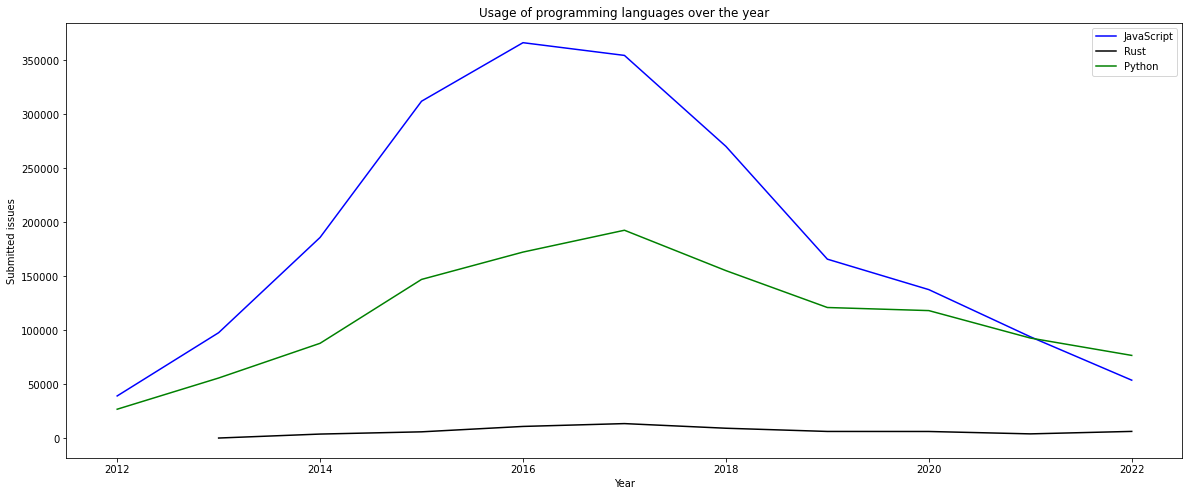

In [149]:
# helper function to get list of values
def get_axes_data(dataframe):
    return [dataframe["year"].tolist(), dataframe["count"].tolist()]

# create a figure
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
# use * as spread operator to get values from [...] returned array
# add legends
ax.plot(*get_axes_data(javascript), color="blue", label="JavaScript")
ax.legend(loc="upper right")
ax.plot(*get_axes_data(rust), color="black", label="Rust")
ax.legend(loc="upper right")
ax.plot(*get_axes_data(python), color="green", label="Python")
ax.legend(loc="upper right")
# set general labels
ax.set_xlabel("Year")
ax.set_ylabel("Submitted issues")
ax.set_title("Usage of programming languages over the year")